In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes.csv")
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


[]

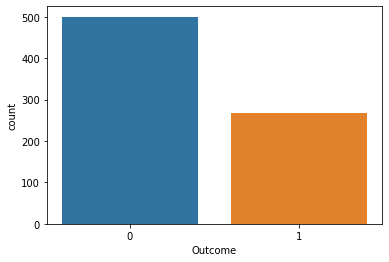

In [9]:
sns.countplot(x="Outcome", data=df)
plt.plot()

In [11]:
# First split train/test 
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [12]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
749,6,162,62,0,0,24.3,0.178,50
452,0,91,68,32,210,39.9,0.381,25
608,0,152,82,39,272,41.5,0.270,27
89,1,107,68,19,0,26.5,0.165,24
371,0,118,64,23,89,0.0,1.731,21
...,...,...,...,...,...,...,...,...
681,0,162,76,36,0,49.6,0.364,26
631,0,102,78,40,90,34.5,0.238,24
337,5,115,76,0,0,31.2,0.343,44
429,1,95,82,25,180,35.0,0.233,43


In [13]:
# Balance data using oversampling, only do this on training set
# SMOTE is used because of imbalance classification in this case
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
cols = df.columns
cols[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [15]:
# Scale train/test, scale X_train and then scale X_test using mean and std of X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=df.columns[:-1])
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.372396,-0.082157,0.469859,-1.269891,-0.678052,-1.259068,-0.733189,0.479531
1,0.209275,1.294527,0.179994,-0.099538,0.800921,-0.885443,0.324139,1.417747
2,0.500111,-0.520193,-1.172710,-0.037941,0.420613,-1.125630,1.041725,0.053069
3,-1.244903,1.732563,-0.109872,1.132412,-0.678052,1.276244,4.470896,-0.799855
4,-0.372396,-0.676634,0.179994,0.578034,0.606541,-0.645255,0.778187,-0.629270
...,...,...,...,...,...,...,...,...
703,1.954289,0.634603,1.104548,0.713850,0.561210,0.485657,-0.178283,1.417747
704,-0.869869,1.211985,0.152021,-1.269891,-0.678052,0.817020,2.090566,-0.068131
705,-0.150118,-0.092079,-0.882845,0.581029,0.775361,-0.342045,2.139746,-0.308207
706,0.145169,-0.328035,-0.328223,-0.338640,-0.678052,-0.475997,-0.402427,-0.395557


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
77,5,95,72,33,0,37.7,0.370,27
631,0,102,78,40,90,34.5,0.238,24
41,7,133,84,0,0,40.2,0.696,37
597,1,89,24,19,25,27.8,0.559,21
694,2,90,60,0,0,23.5,0.191,25
...,...,...,...,...,...,...,...,...
353,1,90,62,12,43,27.2,0.580,24
731,8,120,86,0,0,28.4,0.259,22
704,4,110,76,20,100,28.4,0.118,27
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
######################
##   Random Forest
######################

Training accuracy:  1.0
Testing accuracy:  0.7748917748917749
Precision:  0.6571428571428571
Recall:  0.8117647058823529
F1-Score:  0.7263157894736841
ROC AUC Score:  0.7825946817082998


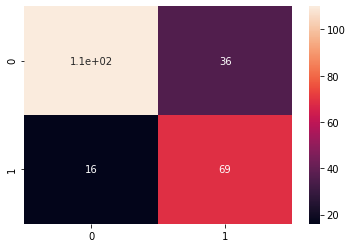

In [25]:
# Random forest
import sklearn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0).fit(X_train_scaled,y_train) 
pred = rf.predict(X_test_scaled)
# Confusion matrix 
# cm = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,pred,labels=rf.classes_),
                              # display_labels=rf.classes_)
cm = sklearn.metrics.confusion_matrix(y_test, pred)

# Calc metrics
train_a = rf.score(X_train_scaled,y_train)
test_a = rf.score(X_test_scaled,y_test)
prec = sklearn.metrics.precision_score(y_test,pred)
rec = sklearn.metrics.recall_score(y_test,pred)
f1 = sklearn.metrics.f1_score(y_test,pred)
auc = sklearn.metrics.roc_auc_score(y_test,pred)

# Print metrics 
print('Training accuracy: ', train_a)
print('Testing accuracy: ', test_a)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1-Score: ', f1)
print('ROC AUC Score: ', auc)

# Plot confusion matrix
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.externals import joblib
joblib.dump(rf, 'diabetes_rf.pkl')
joblib.dump(scaler, 'diabetes_scaler.pkl')

['diabetes_scaler.pkl']

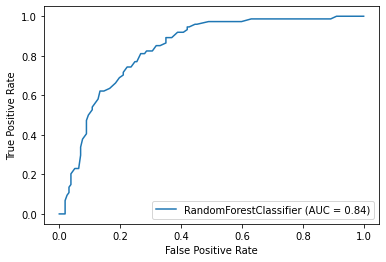

In [ ]:
# Plot ROC Curve
metrics.plot_roc_curve(rf,X_test_scaled,y_test)

In [26]:
######### END ###########

In [ ]:
X_test_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.574282,-0.658146,0.128013,0.741049,1.034089,0.720540,-0.524802,1.861513
1,1.175060,-1.553554,0.025848,1.242406,-0.260290,0.399128,0.640786,0.454169
2,0.273893,-0.658146,1.966983,1.054397,-0.710110,0.921422,-0.582929,2.741104
3,-1.228053,1.626687,-0.484977,0.553040,3.677926,0.305383,1.763543,-1.129094
4,-0.927664,-1.584430,-0.995802,-0.637684,-0.710110,-1.248108,-0.757308,-1.129094
...,...,...,...,...,...,...,...,...
226,-0.026496,-1.059536,0.945333,1.681094,-0.214390,0.720540,-0.408549,-0.425422
227,-0.927664,-0.380261,0.128013,0.615710,0.905569,0.278598,0.099292,-0.777258
228,0.874671,0.021129,0.843168,-1.264380,-0.710110,0.707147,-0.585988,1.509677
229,-0.326886,-1.090412,0.230178,-0.261666,0.070190,-0.257088,0.169656,0.366210


In [ ]:
cols = X_test_scaled.columns
cols.shape

(8,)

In [ ]:
data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
data.shape


(1, 8)

In [ ]:
new_data = pd.DataFrame(data, columns=cols)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0


In [ ]:
data_scaled = pd.DataFrame(scaler.transform(new_data),columns=cols)
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.574282,0.73128,0.128013,0.929058,-0.71011,0.171461,0.402161,1.421718


In [ ]:
rf.predict(data_scaled)

array([1])

In [ ]:
import pickle
pickle.dump(rf, open("diabetes_rf.pkl", "wb"))

In [ ]:
clf = pickle.load(open("diabetes_rf.pkl", "rb"))

In [ ]:
clf.predict(data_scaled)

array([1])

In [ ]:
pickle.dump(scaler, open("diabetes_scaler.pkl", "wb"))

In [ ]:
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.574282,0.73128,0.128013,0.929058,-0.71011,0.171461,0.402161,1.421718
